In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from skimage import exposure
from nilearn import plotting
%matplotlib inline


In [2]:
true_labels = nib.load('../data/ribfrac-challenge/validation/ribfrac-val-labels/RibFrac459-label.nii.gz').get_fdata() + 1

In [3]:
prediction = np.load('../inference-results/RibFrac459-image-prediction.npy')


In [4]:
print("label image shape:", prediction.shape)

label image shape: (512, 512, 333)


In [5]:
prediction.dtype


dtype('float32')

(array([5.4608149e+07, 0.0000000e+00, 3.1325551e+07, 0.0000000e+00,
        0.0000000e+00, 1.5000000e+01, 0.0000000e+00, 2.2341000e+04,
        0.0000000e+00, 1.3378960e+06]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

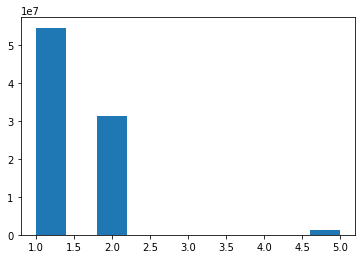

In [6]:
plt.hist(prediction.flatten())

(array([8.7220721e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 7.2369000e+04, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 8.6200000e+02]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

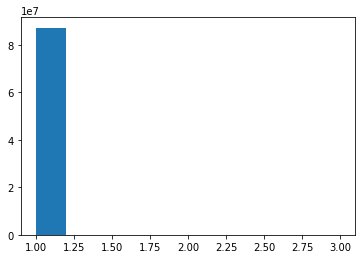

In [7]:
plt.hist(true_labels.flatten())

(512, 512, 333)
(512, 512, 333)
(512, 512)


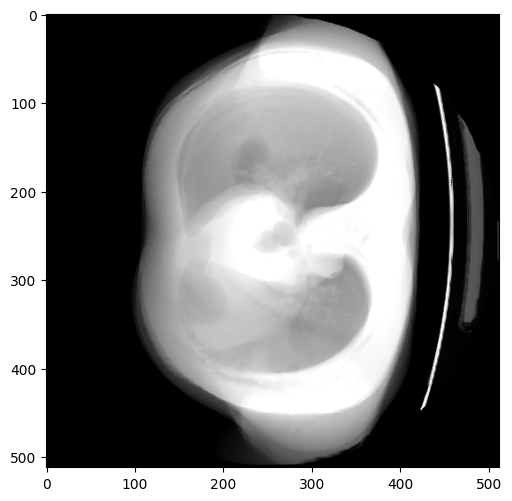

In [8]:
plt.figure(figsize = (6,6), dpi=100) 
print(prediction.shape)
print((prediction > 2).shape)
combined_slices = np.sum(prediction > 1, axis=-1)
print(combined_slices.shape)
plt.imshow(combined_slices, cmap=plt.cm.gray) 

In [9]:
# train_slices = exposure.equalize_hist(train_slices)

NameError: name 'train_slices' is not defined

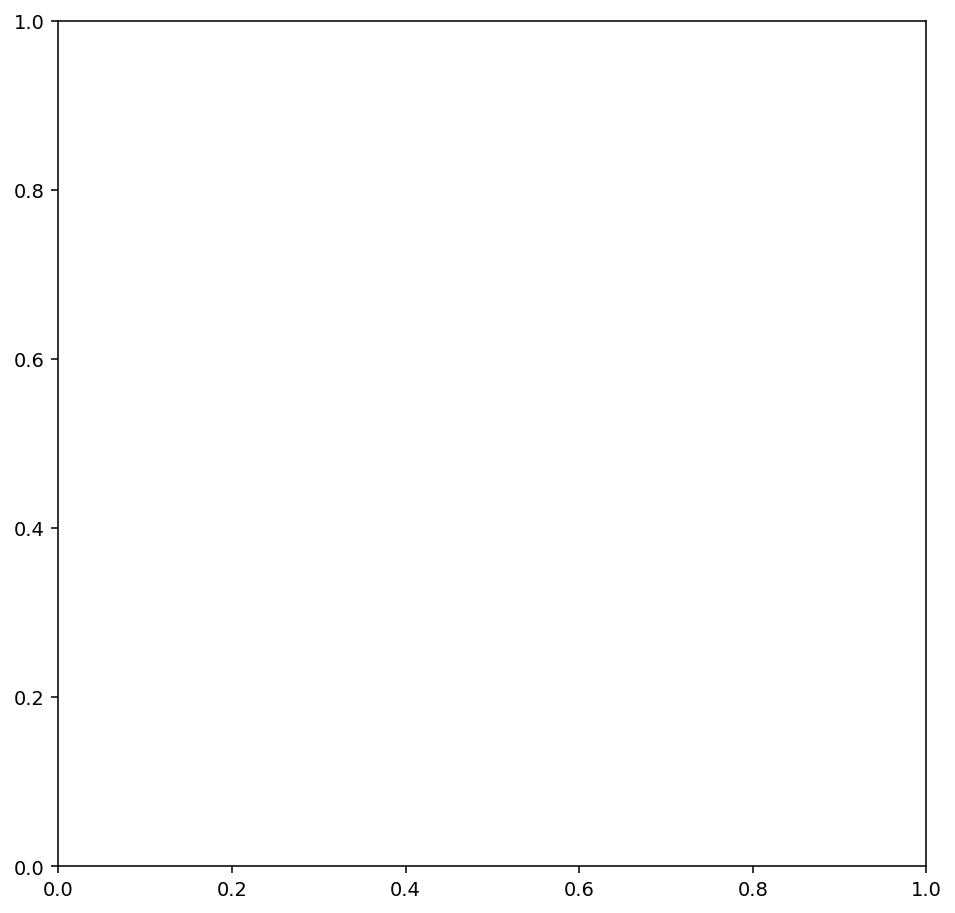

In [10]:
fig, ax = plt.subplots(figsize = (8,8), dpi=140)
ax.imshow(train_slices[100], cmap=plt.cm.gray)
ax.set_axis_off()

In [ ]:
fig, ax = plt.subplots(figsize = (8,8), dpi=140)
ax.imshow(train_slices[0], cmap=plt.cm.gray)
masked = np.ma.masked_where(label_slices[0] == 2, label_slices[0])
ax.imshow(masked, cmap='jet', alpha=0.2) 
ax.set_axis_off()

In [ ]:
fig, ax = plt.subplots(figsize = (8,8), dpi=140)
ax.imshow(train_slices[20], cmap=plt.cm.gray)

masked = np.ma.masked_where(label_slices[20] == 1, label_slices[10])
ax.imshow(masked, cmap='jet', alpha=0.3) 
ax.set_axis_off()